In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pyforest import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [3]:
data = pd.read_excel (r"Data-RAC-ChloridePermeability")
print(data.dtypes)

<IPython.core.display.Javascript object>

PC    float64
FA    float64
BF    float64
SF    float64
WC    float64
SP    float64
SA    float64
NA    float64
RA    float64
WA    float64
RR    float64
WB    float64
FC    float64
AG      int64
CP    float64
dtype: object


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC      536 non-null    float64
 1   FA      536 non-null    float64
 2   BF      536 non-null    float64
 3   SF      536 non-null    float64
 4   WC      536 non-null    float64
 5   SP      536 non-null    float64
 6   SA      536 non-null    float64
 7   NA      536 non-null    float64
 8   RA      536 non-null    float64
 9   WA      536 non-null    float64
 10  RR      536 non-null    float64
 11  WB      536 non-null    float64
 12  FC      536 non-null    float64
 13  AG      536 non-null    int64  
 14  CP      536 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 62.9 KB


In [5]:
# Assuming 'data' is your DataFrame
summary = data.describe()

# Save to Excel
summary.to_excel('data_summary.xlsx', index=True)

print("Summary statistics saved to 'data_summary.xlsx'.")


Summary statistics saved to 'data_summary.xlsx'.


In [6]:
data.columns

Index(['PC', 'FA', 'BF', 'SF', 'WC', 'SP', 'SA', 'NA', 'RA', 'WA', 'RR', 'WB',
       'FC', 'AG', 'CP'],
      dtype='object')

In [7]:
target_col='CP'

In [8]:
input_cols=['PC', 'FA', 'BF', 'SF', 'WC', 'SP', 'SA', 'NA', 'RA', 'WA', 'RR',
       'WB', 'FC', 'AG']

In [9]:
inputs = data[input_cols].copy()
targets = data[target_col].copy()

In [10]:
targets

0      4509.164969
1      3837.067210
2      3421.588595
3      3177.189409
4      4985.743381
          ...     
531    1254.810000
532    1855.770000
533    1072.120000
534    1211.540000
535    2081.730000
Name: CP, Length: 536, dtype: float64

In [11]:
inputs

,PC,FA,BF,SF,WC,SP,SA,NA,RA,WA,RR,WB,FC,AG
0,390.0,0.0,0.0,0.0,195.0,0.0,678.0,1107.0,0.0,4.26,0.0,0.500,0.612466,28
1,351.0,0.0,0.0,39.0,195.0,0.0,664.0,1107.0,0.0,4.26,0.0,0.500,0.599819,28
2,253.5,136.5,0.0,0.0,195.0,0.0,640.0,1107.0,0.0,4.26,0.0,0.500,0.578139,28
3,175.5,0.0,214.5,0.0,195.0,0.0,658.0,1107.0,0.0,4.26,0.0,0.500,0.594399,28
4,390.0,0.0,0.0,0.0,195.0,0.0,678.0,527.0,539.0,4.26,50.0,0.500,0.636023,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,380.0,0.0,0.0,0.0,149.8,0.0,927.0,543.2,487.5,4.90,50.0,0.285,0.899389,28
532,380.0,0.0,0.0,0.0,170.4,0.0,927.0,0.0,975.1,4.90,100.0,0.285,0.950672,28
533,380.0,0.0,0.0,0.0,139.7,0.0,927.0,869.2,187.8,4.90,20.0,0.285,0.877010,28
534,380.0,0.0,0.0,0.0,153.1,0.0,927.0,543.4,469.4,4.90,50.0,0.285,0.915284,28


In [12]:
numeric_cols=['PC', 'FA', 'BF', 'SF', 'WC', 'SP', 'SA', 'NA', 'RA', 'WA', 'RR',
       'WB', 'FC', 'AG']


In [13]:
numeric_inputs=inputs[numeric_cols]

In [14]:
numeric_inputs

,PC,FA,BF,SF,WC,SP,SA,NA,RA,WA,RR,WB,FC,AG
0,390.0,0.0,0.0,0.0,195.0,0.0,678.0,1107.0,0.0,4.26,0.0,0.500,0.612466,28
1,351.0,0.0,0.0,39.0,195.0,0.0,664.0,1107.0,0.0,4.26,0.0,0.500,0.599819,28
2,253.5,136.5,0.0,0.0,195.0,0.0,640.0,1107.0,0.0,4.26,0.0,0.500,0.578139,28
3,175.5,0.0,214.5,0.0,195.0,0.0,658.0,1107.0,0.0,4.26,0.0,0.500,0.594399,28
4,390.0,0.0,0.0,0.0,195.0,0.0,678.0,527.0,539.0,4.26,50.0,0.500,0.636023,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,380.0,0.0,0.0,0.0,149.8,0.0,927.0,543.2,487.5,4.90,50.0,0.285,0.899389,28
532,380.0,0.0,0.0,0.0,170.4,0.0,927.0,0.0,975.1,4.90,100.0,0.285,0.950672,28
533,380.0,0.0,0.0,0.0,139.7,0.0,927.0,869.2,187.8,4.90,20.0,0.285,0.877010,28
534,380.0,0.0,0.0,0.0,153.1,0.0,927.0,543.4,469.4,4.90,50.0,0.285,0.915284,28


In [56]:
import plotly.express as px

# Create the histogram with a marginal box plot
fig = px.histogram(
    data, 
    x='CP', 
    marginal='box', 
    nbins=47
)

# Set all bars to red
fig.update_traces(marker_color='navy')

# Update layout for better aesthetics and a square figure
fig.update_layout(
    bargap=0.1,  # Space between bars
    title=dict(
        x=0.5,  # Center-align title
        font=dict(size=18, color='black')
    ),
    xaxis_title="CP (Coulombs)",
    yaxis_title="Frequency",
    font=dict(size=14),  # Font size for readability
    template='plotly_white',  # Clean look
    width=350,  # Adjust width for square shape
    height=350  # Adjust height to match width
)

# Show the figure
fig.show()


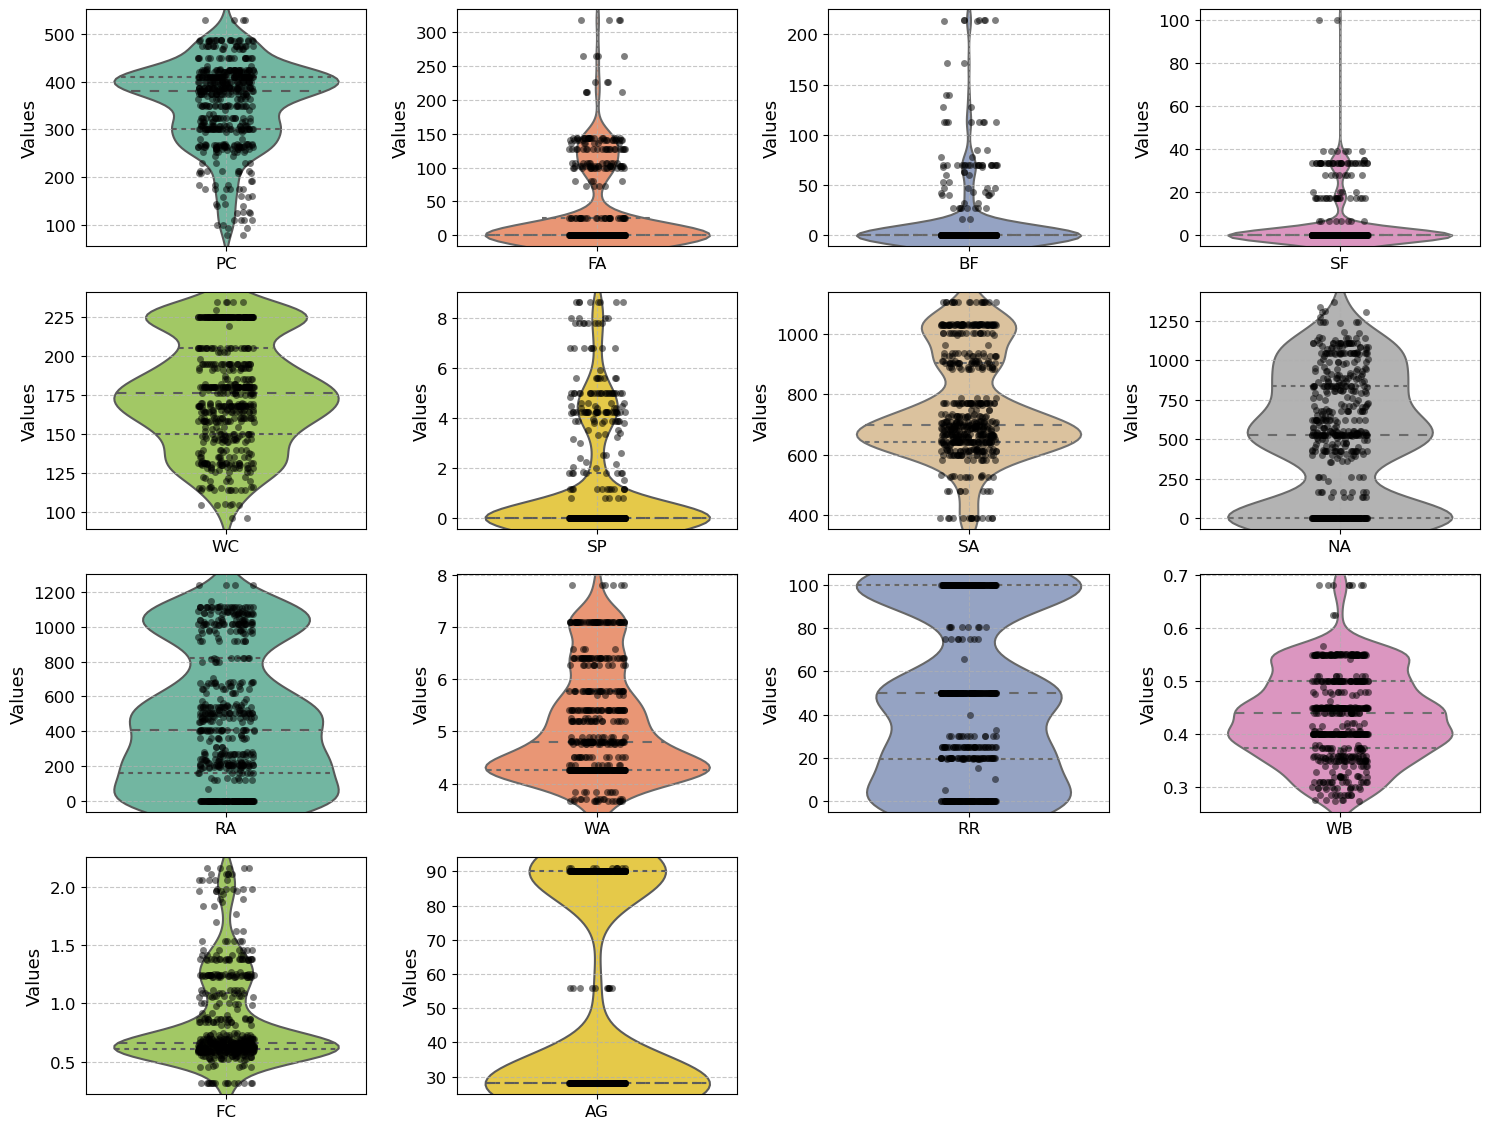

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Features to plot
features = ['PC', 'FA', 'BF', 'SF', 'WC', 'SP', 'SA', 'NA', 'RA', 'WA', 'RR',
       'WB', 'FC', 'AG']

# Create a color palette for better visibility
colors = sns.color_palette("Set2", len(features))  # Adjust color palette length dynamically

# Assuming 'data' is already defined and contains the required columns
try:
    melted_data = pd.melt(data)
    assert 'variable' in melted_data.columns and 'value' in melted_data.columns, \
        "Melted data must have 'variable' and 'value' columns."
    
    # Convert 'value' column to numeric, coercing errors to NaN
    melted_data['value'] = pd.to_numeric(melted_data['value'], errors='coerce')
    
    # Drop rows where 'value' is NaN (non-numeric values)
    melted_data = melted_data.dropna(subset=['value'])

    # Calculate the number of rows and columns needed for subplots
    n_features = len(features)
    n_cols = 4 # Fixed number of columns
    n_rows = math.ceil(n_features / n_cols)

    # Set up the figure with the appropriate number of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
    axes = axes.flatten()  # Flatten to easily iterate over

    # Plot each feature in a subplot
    for i, feature in enumerate(features):
        feature_data = melted_data[melted_data['variable'] == feature]
        
        # Ensure feature data is not empty
        if feature_data.empty:
            print(f"Warning: No data for feature '{feature}'. Skipping this plot.")
            continue

        sns.violinplot(
            x="variable",
            y="value",
            data=feature_data,
            palette=[colors[i]],
            scale="width",
            inner="quartile",
            ax=axes[i]
        )

        sns.stripplot(
            x="variable",
            y="value",
            data=feature_data,
            marker="o",
            alpha=0.5,
            color="black",
            ax=axes[i]
        )

        # Remove x-axis label
        axes[i].set_xlabel("")

        # Set y-axis label with increased font size
        axes[i].set_ylabel("Values", fontsize=13)

        # Set tick parameters for readability
        axes[i].tick_params(axis='both', which='major', labelsize=12)

        # Customize grid lines
        axes[i].grid(True, linestyle="--", alpha=0.7)

    # Turn off unused axes
    for j in range(n_features, len(axes)):
        fig.delaxes(axes[j])

    # Center the last row of subplots
    extra_space = n_cols - (n_features % n_cols) if n_features % n_cols != 0 else 0
    if extra_space > 0:
        last_row_axes = axes[-(n_features % n_cols):] if n_features % n_cols != 0 else []
        shift = (extra_space / 2) * (1 / n_cols)  # Calculate shift as a fraction of figure width
        for ax in last_row_axes:
            pos = ax.get_position()
            ax.set_position([pos.x0 + shift, pos.y0, pos.width, pos.height])

    # Adjust the layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Show the final plot
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


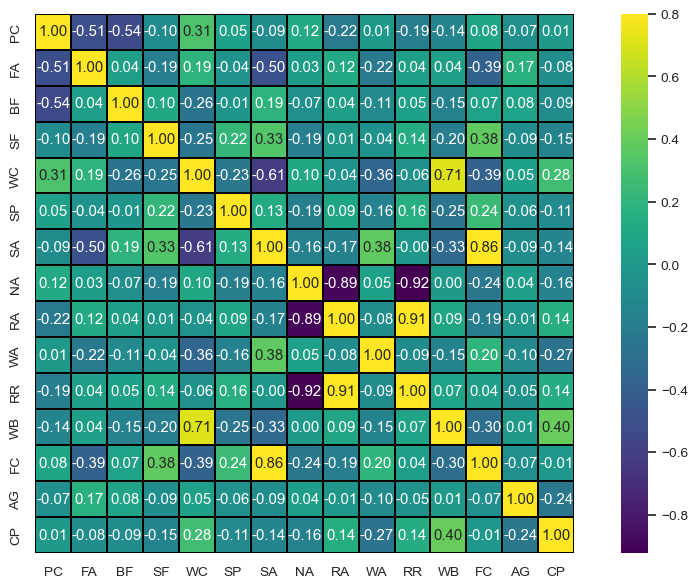

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
cor = data.corr()

# Set the font scale
sns.set(font_scale=0.9)

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True, annot=True, fmt='.2f', cmap="viridis", linecolor="black")
#plt.title('Correlation between features')
plt.show()


In [18]:
numeric_cols=['PC', 'FA', 'BF', 'SF', 'WC', 'SP', 'SA', 'NA', 'RA', 'WA', 'RR',
       'WB', 'FC', 'AG']


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

In [20]:
inputs

,PC,FA,BF,SF,WC,SP,SA,NA,RA,WA,RR,WB,FC,AG
0,0.690265,0.000000,0.0,0.00,0.716878,0.0,0.403631,0.810395,0.000000,0.142857,0.0,0.555556,0.161908,0.0
1,0.603982,0.000000,0.0,0.39,0.716878,0.0,0.384078,0.810395,0.000000,0.142857,0.0,0.555556,0.155055,0.0
2,0.388274,0.429245,0.0,0.00,0.716878,0.0,0.350559,0.810395,0.000000,0.142857,0.0,0.555556,0.143305,0.0
3,0.215708,0.000000,1.0,0.00,0.716878,0.0,0.375698,0.810395,0.000000,0.142857,0.0,0.555556,0.152117,0.0
4,0.690265,0.000000,0.0,0.00,0.716878,0.0,0.403631,0.385798,0.434677,0.142857,0.5,0.555556,0.174675,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,0.668142,0.000000,0.0,0.00,0.388748,0.0,0.751397,0.397657,0.393145,0.297821,0.5,0.024691,0.317403,0.0
532,0.668142,0.000000,0.0,0.00,0.538294,0.0,0.751397,0.000000,0.786371,0.297821,1.0,0.024691,0.345196,0.0
533,0.668142,0.000000,0.0,0.00,0.315426,0.0,0.751397,0.636310,0.151452,0.297821,0.2,0.024691,0.305276,0.0
534,0.668142,0.000000,0.0,0.00,0.412704,0.0,0.751397,0.397804,0.378548,0.297821,0.5,0.024691,0.326018,0.0


In [21]:
inputs 

,PC,FA,BF,SF,WC,SP,SA,NA,RA,WA,RR,WB,FC,AG
0,0.690265,0.000000,0.0,0.00,0.716878,0.0,0.403631,0.810395,0.000000,0.142857,0.0,0.555556,0.161908,0.0
1,0.603982,0.000000,0.0,0.39,0.716878,0.0,0.384078,0.810395,0.000000,0.142857,0.0,0.555556,0.155055,0.0
2,0.388274,0.429245,0.0,0.00,0.716878,0.0,0.350559,0.810395,0.000000,0.142857,0.0,0.555556,0.143305,0.0
3,0.215708,0.000000,1.0,0.00,0.716878,0.0,0.375698,0.810395,0.000000,0.142857,0.0,0.555556,0.152117,0.0
4,0.690265,0.000000,0.0,0.00,0.716878,0.0,0.403631,0.385798,0.434677,0.142857,0.5,0.555556,0.174675,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,0.668142,0.000000,0.0,0.00,0.388748,0.0,0.751397,0.397657,0.393145,0.297821,0.5,0.024691,0.317403,0.0
532,0.668142,0.000000,0.0,0.00,0.538294,0.0,0.751397,0.000000,0.786371,0.297821,1.0,0.024691,0.345196,0.0
533,0.668142,0.000000,0.0,0.00,0.315426,0.0,0.751397,0.636310,0.151452,0.297821,0.2,0.024691,0.305276,0.0
534,0.668142,0.000000,0.0,0.00,0.412704,0.0,0.751397,0.397804,0.378548,0.297821,0.5,0.024691,0.326018,0.0


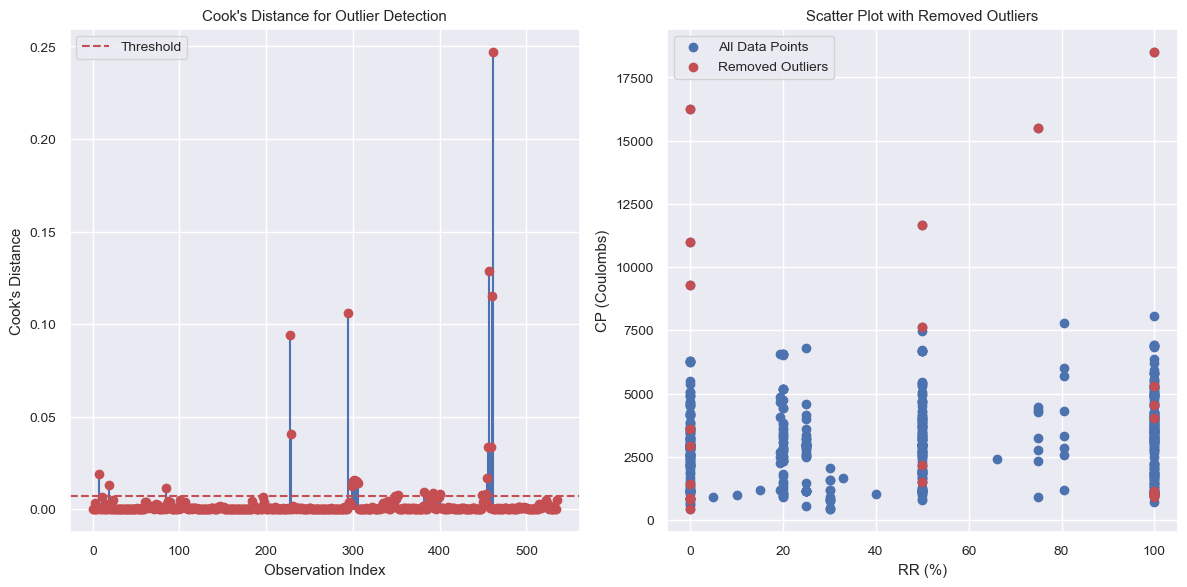

DataFrame without outliers:
        PC     FA     BF    SF     WC   SP     SA      NA     RA    WA     RR  \
0    390.0    0.0    0.0   0.0  195.0  0.0  678.0  1107.0    0.0  4.26    0.0   
1    351.0    0.0    0.0  39.0  195.0  0.0  664.0  1107.0    0.0  4.26    0.0   
2    253.5  136.5    0.0   0.0  195.0  0.0  640.0  1107.0    0.0  4.26    0.0   
3    175.5    0.0  214.5   0.0  195.0  0.0  658.0  1107.0    0.0  4.26    0.0   
4    390.0    0.0    0.0   0.0  195.0  0.0  678.0   527.0  539.0  4.26   50.0   
..     ...    ...    ...   ...    ...  ...    ...     ...    ...   ...    ...   
531  380.0    0.0    0.0   0.0  149.8  0.0  927.0   543.2  487.5  4.90   50.0   
532  380.0    0.0    0.0   0.0  170.4  0.0  927.0     0.0  975.1  4.90  100.0   
533  380.0    0.0    0.0   0.0  139.7  0.0  927.0   869.2  187.8  4.90   20.0   
534  380.0    0.0    0.0   0.0  153.1  0.0  927.0   543.4  469.4  4.90   50.0   
535  380.0    0.0    0.0   0.0  175.3  0.0  927.0     0.0  938.8  4.90  100.0   


In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and 'dependent_variable' is the column you want to analyze
# Define the dependent variables
dependent_variable = 'CP'  # Choose the primary target variable ('CS' or 'TC')
columns_to_drop = ['CP']  # Columns to exclude from the predictors

# Prepare X by dropping both specified columns and adding a constant
X = data.drop(columns=columns_to_drop)
y = data[dependent_variable]


model = sm.OLS(y, X).fit()

# Get Cook's distance
influence = model.get_influence()
cook_distance = influence.cooks_distance[0]

# Set a threshold for Cook's distance to identify outliers
threshold = 4 / len(data)

# Identify and remove outliers
outliers = np.where(cook_distance > threshold)[0]
df_CS_no_outliers = data.drop(outliers)

# Plot Cook's distance
plt.figure(figsize=(12, 6))

# Plot Cook's distance for all points
plt.subplot(1, 2, 1)
plt.stem(cook_distance, markerfmt='ro', linefmt='b-')
plt.title("Cook's Distance for Outlier Detection")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()

# Plot the removed data points
plt.subplot(1, 2, 2)
plt.scatter(data['RR'], data['CP'], label='All Data Points')
plt.scatter(data.iloc[outliers]['RR'], data.iloc[outliers]['CP'], color='r', label='Removed Outliers')
plt.title('Scatter Plot with Removed Outliers')
plt.xlabel('RR (%)')
plt.ylabel('CP (Coulombs)')
plt.legend()

plt.tight_layout()
plt.show()

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(df_CS_no_outliers)


In [23]:
inputs = df_CS_no_outliers[input_cols].copy()
targets = df_CS_no_outliers[target_col].copy()

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
inputs

,PC,FA,BF,SF,WC,SP,SA,NA,RA,WA,RR,WB,FC,AG
0,0.690265,0.000000,0.0,0.0,0.716878,0.0,0.403631,0.810395,0.000000,0.142857,0.0,0.555556,0.161908,0.0
1,0.603982,0.000000,0.0,1.0,0.716878,0.0,0.384078,0.810395,0.000000,0.142857,0.0,0.555556,0.155055,0.0
2,0.388274,0.429245,0.0,0.0,0.716878,0.0,0.350559,0.810395,0.000000,0.142857,0.0,0.555556,0.143305,0.0
3,0.215708,0.000000,1.0,0.0,0.716878,0.0,0.375698,0.810395,0.000000,0.142857,0.0,0.555556,0.152117,0.0
4,0.690265,0.000000,0.0,0.0,0.716878,0.0,0.403631,0.385798,0.434677,0.142857,0.5,0.555556,0.174675,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,0.668142,0.000000,0.0,0.0,0.388748,0.0,0.751397,0.397657,0.393145,0.297821,0.5,0.024691,0.317403,0.0
532,0.668142,0.000000,0.0,0.0,0.538294,0.0,0.751397,0.000000,0.786371,0.297821,1.0,0.024691,0.345196,0.0
533,0.668142,0.000000,0.0,0.0,0.315426,0.0,0.751397,0.636310,0.151452,0.297821,0.2,0.024691,0.305276,0.0
534,0.668142,0.000000,0.0,0.0,0.412704,0.0,0.751397,0.397804,0.378548,0.297821,0.5,0.024691,0.326018,0.0


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,targets, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(382, 14)
(128, 14)
(382,)
(128,)


# GradientBoostingMachine

In [26]:
from xgboost import XGBRegressor

In [27]:
model = XGBRegressor(random_state=42, n_estimators=20, max_depth=4)

In [28]:
%%time
model.fit(X_train, y_train)

CPU times: total: 391 ms
Wall time: 218 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [29]:
preds = model.predict(X_train)

# Evaluation 

In [30]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [31]:
rmse(preds, y_train)

295.48630744643646

# Cross-validation

In [32]:
from sklearn.model_selection import KFold

In [33]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [34]:
kfold = KFold(n_splits=10,shuffle=True)

In [35]:
X=X_train.copy()
targets=y_train.copy()

In [36]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 300.5772558116117, Validation RMSE: 624.3641533998065
Train RMSE: 289.6757286399444, Validation RMSE: 545.2389107104176
Train RMSE: 301.31921291492984, Validation RMSE: 522.9005580528618
Train RMSE: 320.5295637037403, Validation RMSE: 402.9617570399722
Train RMSE: 286.7818516016844, Validation RMSE: 654.9297559033793
Train RMSE: 299.496647324329, Validation RMSE: 747.3481437985517
Train RMSE: 315.76238774002604, Validation RMSE: 397.7061730475698
Train RMSE: 288.7465278950846, Validation RMSE: 610.2759704851583
Train RMSE: 327.76318009581996, Validation RMSE: 332.97060984540286
Train RMSE: 294.4093444998665, Validation RMSE: 729.3869035438581


In [37]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [38]:
preds = predict_avg(models, X)

In [39]:
preds

array([2759.1128 , 3661.4155 , 2041.1791 , 2394.9675 , 3358.2585 ,
       3108.3147 , 3023.9731 , 2394.4473 , 5191.5874 , 2619.0122 ,
       6298.1055 , 3491.2644 , 1324.1825 , 5315.6104 , 3726.4985 ,
       1199.8815 , 3185.8013 , 2131.8743 , 4146.9595 ,  688.0954 ,
       4165.987  , 6461.9053 , 3572.9595 , 2641.1326 , 2707.7065 ,
       3012.1982 ,  862.31506, 1185.2687 , 1324.1825 , 3684.101  ,
       6688.042  , 3430.3667 , 3932.972  , 2512.6807 , 5057.5254 ,
       2450.8586 , 3104.0737 , 1213.9298 , 2938.2603 , 1140.6134 ,
       3400.705  , 2905.1938 , 1380.7129 , 3554.3965 , 3935.4348 ,
       1170.3423 , 2816.8667 , 4910.716  , 2606.8574 , 4052.2234 ,
       3890.1172 , 1552.8055 , 2990.0398 , 3677.9    , 6461.9053 ,
       1042.1545 , 3636.4575 , 3799.0396 , 1580.4612 , 2790.177  ,
       2386.7344 , 3347.0122 , 3053.0515 , 2041.1791 , 4511.429  ,
        932.87714, 2819.8127 ,  838.6623 , 3021.9187 , 1727.6233 ,
       1787.4713 , 6298.1055 , 2814.0269 , 3666.9155 , 2854.15

In [40]:
rmse(preds, targets)

303.76426778320825

In [46]:
"""
#Optionally, save results to a CSV file for further analysis
results_df.to_csv('hyperparameter_results.csv', index=False)
"""

"\n#Optionally, save results to a CSV file for further analysis\nresults_df.to_csv('hyperparameter_results.csv', index=False)\n"

In [47]:
"""
# Sort by the best validation score
best_combination = results_df.sort_values(by='Validation Score', ascending=True).iloc[0]

# Display the best combination
print("Best Combination of Parameters:")
print(best_combination)
"""

'\n# Sort by the best validation score\nbest_combination = results_df.sort_values(by=\'Validation Score\', ascending=True).iloc[0]\n\n# Display the best combination\nprint("Best Combination of Parameters:")\nprint(best_combination)\n'

# Optimum model

In [48]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=550, 
                     learning_rate=0.9, max_depth=2)

In [49]:
%%time
model.fit(X, targets)

CPU times: total: 1.94 s
Wall time: 238 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=550, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [50]:
preds = model.predict(X)
preds

array([2857.2612 , 3599.6416 , 1794.3147 , 2295.835  , 3272.8762 ,
       2949.9707 , 2672.3318 , 2464.9104 , 5534.774  , 2466.9998 ,
       6240.759  , 3225.6692 , 1380.7747 , 5477.735  , 3460.4521 ,
       1119.976  , 3436.4724 , 1814.9326 , 4104.2695 ,  523.4225 ,
       4188.345  , 6500.529  , 3325.6714 , 2557.274  , 2846.8008 ,
       3116.4087 ,  668.4259 , 1158.3423 , 1380.7747 , 3437.5708 ,
       6915.8857 , 3260.0671 , 3934.448  , 2288.7163 , 4960.7373 ,
       2455.5022 , 3116.9084 ,  796.39996, 2817.8308 , 1146.3268 ,
       3543.249  , 2627.1057 , 1468.6101 , 3493.0125 , 4129.8677 ,
        644.9351 , 2794.6697 , 5222.138  , 2760.1245 , 4070.8342 ,
       3777.2932 , 1544.3147 , 2963.9846 , 3752.6838 , 6500.529  ,
       1052.7604 , 4478.4663 , 4341.5312 , 1269.1443 , 2575.0046 ,
       2462.0537 , 3159.4856 , 2187.9426 , 1794.3147 , 4553.3    ,
        868.04626, 2980.6523 ,  985.2384 , 3161.6465 , 1471.8812 ,
       1303.6771 , 6240.759  , 2895.2908 , 4587.151  , 2980.49

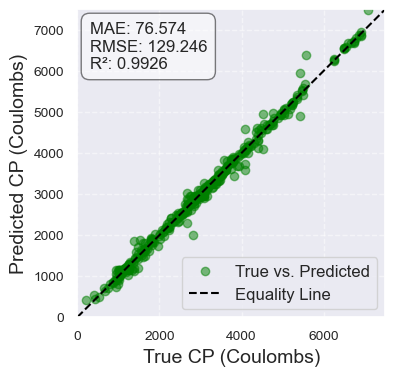

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Generate some sample data for demonstration purposes
np.random.seed(42)

# Plot true versus predicted values
plt.figure(figsize=(4, 4))  # Set the figure size to be square
plt.scatter(preds, targets, alpha=0.5, color='green', label='True vs. Predicted')

# Set labels and title
plt.xlabel('True CP (Coulombs)', fontsize=14)
plt.ylabel('Predicted CP (Coulombs)', fontsize=14)


# Set axis limits
plt.xlim([0, 7500])
plt.ylim([0, 7500])

# Plot the equality line
plt.plot([0, 10000], [0, 10000], color='black', linestyle='--', label='Equality Line')

# Add legend with appropriate font size
plt.legend(loc='lower right', fontsize=12)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Add text box with statistics in top left corner
plt.text(300, 7200, f'MAE: {mean_absolute_error(preds, targets):.3f}\nRMSE: {np.sqrt(mean_squared_error(preds, targets)):.3f}\nR²: {r2_score(preds, targets):.4f}',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'), ha='left', va='top', fontsize=12)

# Add background boundary
ax = plt.gca()
rect = patches.Rectangle((0, 0), 0.6, 0.6, linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(rect)

# Set aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


In [52]:
test_preds = model.predict(X_test)



# Assuming test_preds and test_targets are 1D arrays or lists
results_test = pd.DataFrame({
    'Predictions': test_preds,
    'Targets': y_test
})

# Optionally, save results to a CSV file for further analysis
results_test.to_csv('test_results.csv', index=False)

# View the results
print(results_test)


     Predictions      Targets
506  2270.638184  2642.470000
475  6330.926758  6572.000000
501  5466.123535  5778.580000
454  4038.476074  4250.460000
384  4543.867188  4289.000000
..           ...          ...
243  3006.128906  2952.000000
423  2992.598389  2911.764706
321  4619.275391  5066.000000
494  1529.081055  1113.510000
450  4063.990967  3984.700000

[128 rows x 2 columns]


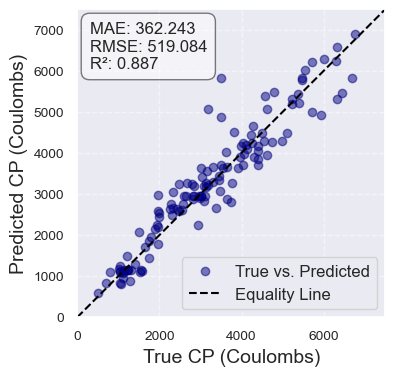

In [53]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Generate some sample data for demonstration purposes
np.random.seed(42)

# Plot true versus predicted values
plt.figure(figsize=(4, 4))  # Set the figure size to be square
plt.scatter(test_preds, y_test, alpha=0.5, color='navy', label='True vs. Predicted')

# Set labels and title
plt.xlabel('True CP (Coulombs)', fontsize=14)
plt.ylabel('Predicted CP (Coulombs)', fontsize=14)


# Set axis limits
plt.xlim([0, 7500])
plt.ylim([0, 7500])

# Plot the equality line
plt.plot([0, 10000], [0, 10000], color='black', linestyle='--', label='Equality Line')

# Add legend with appropriate font size
plt.legend(loc='lower right', fontsize=12)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Add text box with statistics in top left corner
plt.text(300, 7200, f'MAE: {mean_absolute_error(test_preds, y_test):.3f}\nRMSE: {np.sqrt(mean_squared_error(test_preds, y_test)):.3f}\nR²: {r2_score(test_preds, y_test):.3f}',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'), ha='left', va='top', fontsize=12)

# Add background boundary
ax = plt.gca()
rect = patches.Rectangle((0, 0), 0.6, 0.6, linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(rect)

# Set aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


In [153]:
trees = model.get_booster().get_dump()

In [154]:
print(trees[549])

0:[WA<0.628329277] yes=1,no=2,missing=2
	1:[PC<0.667086244] yes=3,no=4,missing=4
		3:leaf=0.872348309
		4:leaf=-2.91766405
	2:[SA<0.310055852] yes=5,no=6,missing=6
		5:leaf=26.4147415
		6:leaf=0.374103397



# Feature importance

In [155]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [156]:
importance_df.head(50)
importance_df.to_csv('importance_df_results.csv', index=False)

# View the results
print(results_test)

     Predictions      Targets
253  3100.237549  2952.000000
80   3751.716064  4196.000000
251  2615.227783  2952.000000
372  1757.344971  3970.000000
509  2761.126709  3092.560000
..           ...          ...
524  2912.411133  2952.000000
179   980.643616  1105.782793
127  5386.424316  5226.361032
414  6517.229492  6529.411765
222  4532.258789  4861.000000

[137 rows x 2 columns]


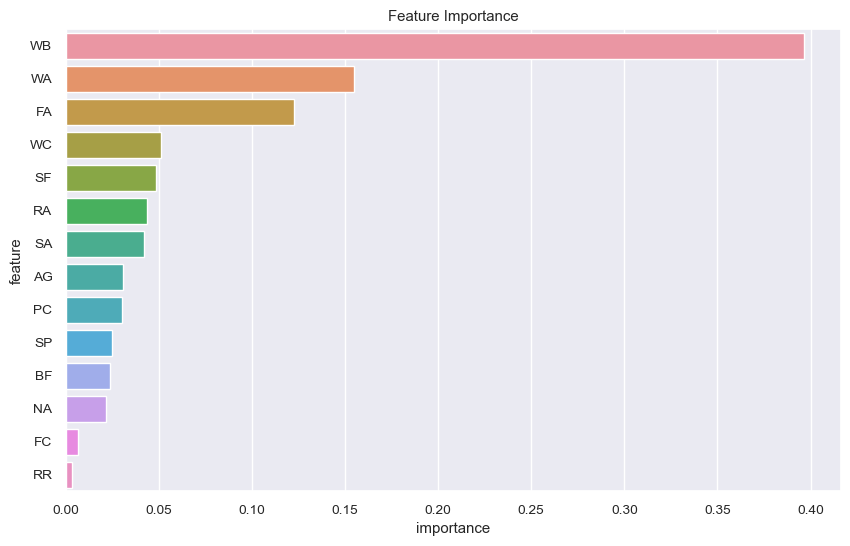

In [157]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(14), x='importance', y='feature');

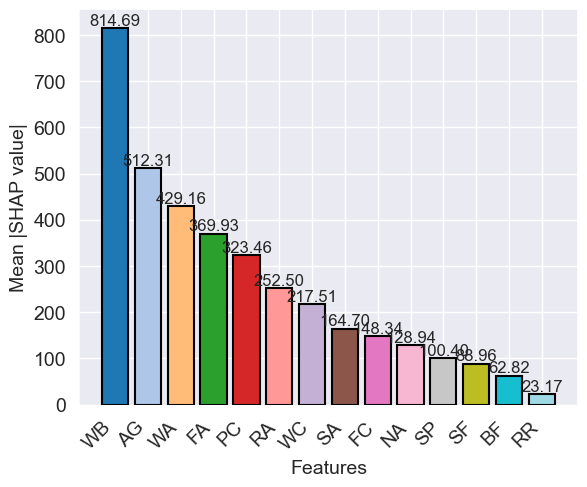

In [158]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming rf_model is your trained Random Forest model
# and X_train is your training dataset

# Create the SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Calculate the mean absolute SHAP values for each feature
shap_sum = np.abs(shap_values[1]).mean(axis=0) if isinstance(shap_values, list) else np.abs(shap_values).mean(axis=0)

# Feature names
feature_names = X_train.columns

# Sort the SHAP values and feature names in descending order of importance
sorted_indices = np.argsort(shap_sum)[::-1]
sorted_shap_sum = shap_sum[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a list of distinct colors for each bar
num_features = len(sorted_feature_names)
custom_colors = plt.cm.get_cmap('tab20', num_features)  # 'tab20' has a wide variety of colors

# Plot vertical bars with higher values on the left
plt.figure(figsize=[6, 5])
x_pos = np.arange(len(sorted_feature_names))

# Assigning a unique color to each bar
bars = plt.bar(x_pos, sorted_shap_sum, color=custom_colors(range(num_features)), edgecolor='black', linewidth=1.5)

# Add the sorted feature names as x-axis labels
plt.xticks(x_pos, sorted_feature_names, rotation=45, ha="right", fontsize=14)

# Add the SHAP values labels above the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, 
             f'{height:.2f}', ha='center', va='bottom', fontsize=12)

#plt.title('Mean |SHAP Values| for Features', fontsize=22)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mean |SHAP value|', fontsize=14)

# Add a frame around the plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Set tick parameters to 22
plt.tick_params(axis='both', which='major', labelsize=14)

# Show plot
plt.tight_layout()
plt.show()


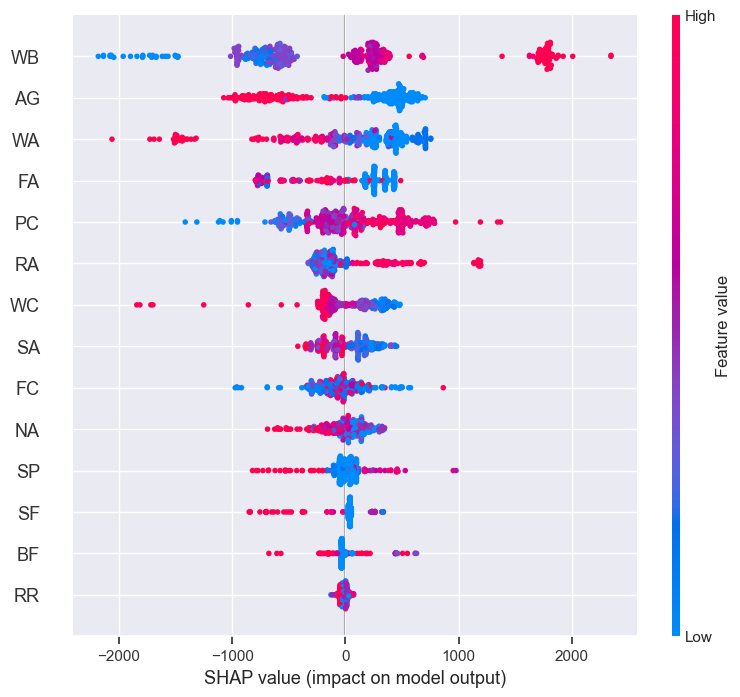

In [159]:

shap.summary_plot(shap_values, X[numeric_cols])


In [160]:




# Reverse scaling to get original values
inputs[numeric_cols] = scaler.inverse_transform(inputs[numeric_cols])
inputs

,PC,FA,BF,SF,WC,SP,SA,NA,RA,WA,RR,WB,FC,AG
0,390.0,0.0,0.0,0.0,195.0,0.0,678.0,1107.0,0.0,4.26,0.0,0.5,0.612466,28.0
1,351.0,0.0,0.0,39.0,195.0,0.0,664.0,1107.0,0.0,4.26,0.0,0.5,0.599819,28.0
2,253.5,136.5,0.0,0.0,195.0,0.0,640.0,1107.0,0.0,4.26,0.0,0.5,0.578139,28.0
3,175.5,0.0,214.5,0.0,195.0,0.0,658.0,1107.0,0.0,4.26,0.0,0.5,0.594399,28.0
4,390.0,0.0,0.0,0.0,195.0,0.0,678.0,527.0,539.0,4.26,50.0,0.5,0.636023,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,388.3,166.4,0.0,0.0,221.9,0.7,814.8,404.3,370.5,7.32,50.0,0.4,1.051626,28.0
577,388.3,166.4,0.0,0.0,221.9,0.7,814.8,404.3,370.5,7.32,50.0,0.4,1.051626,28.0
578,353.7,151.6,0.0,0.0,202.1,1.2,742.1,580.0,370.5,7.32,40.0,0.4,0.780747,28.0
579,388.3,166.4,0.0,0.0,221.9,0.7,814.8,404.3,370.5,7.32,50.0,0.4,1.051626,28.0


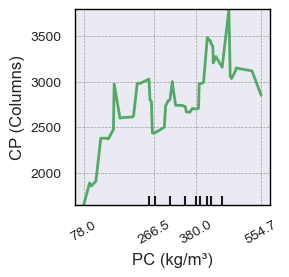

In [177]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

# Generate Partial Dependence Plot using scaled X
fig, ax = plt.subplots(figsize=(3, 2.9))
tree_disp = PartialDependenceDisplay.from_estimator(model, X, [0], ax=ax)

# Extract grid values (X-axis values in scaled form)
scaled_feature_values = tree_disp.lines_[0][0].get_xdata()

# Convert scaled values back to original values
original_feature_values = scaler.inverse_transform(np.hstack((scaled_feature_values.reshape(-1, 1), 
                                                              np.zeros((scaled_feature_values.shape[0], X.shape[1] - 1)))))[:, 0]

# Customize the x-axis labels to show original values
for axis in tree_disp.axes_.ravel():
    axis.set_xticks(scaled_feature_values)  # Keep the same tick positions
    axis.set_xticklabels(np.round(original_feature_values, 2))  # Replace labels with original values

# Customize the line color and appearance of the plot
for axis in tree_disp.axes_.ravel():
    for line in axis.get_lines():
        line.set_color('g')  # Set line color to green
        line.set_linewidth(2)  # Make the line thicker for better visibility

# Update the y-axis label
for axis in tree_disp.axes_.ravel():
    axis.set_ylabel('CP (Columns)', fontsize=12, fontweight='normal')

# Customize the x-axis label to show correct feature unit
axis.set_xlabel('PC (kg/m³)', fontsize=12, fontweight='normal')

# Set tick font size
axis.tick_params(axis='both', which='major', labelsize=10)

# Add grid lines
axis.minorticks_on()
axis.grid(which='major', linewidth=0.5, color='grey', linestyle='--', alpha=0.7)
axis.grid(which='minor', linewidth=0.3, color='lightgrey', linestyle=':', alpha=0.5)

# Customize plot borders
for spine in axis.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)
    # Reduce the number of X-ticks for better spacing
num_ticks = 4 # Adjust based on dataset
selected_indices = np.linspace(0, len(scaled_feature_values) - 1, num_ticks, dtype=int)

# Select fewer X-tick positions
reduced_xticks = scaled_feature_values[selected_indices]
reduced_xticklabels = np.round(original_feature_values[selected_indices], 1)  # Round to 1 decimal place

# Apply new X-ticks
for axis in tree_disp.axes_.ravel():
    axis.set_xticks(reduced_xticks)
    axis.set_xticklabels(reduced_xticklabels, fontsize=10, rotation=30)  # Rotate for better visibility

# Remove minor ticks to avoid clutter
axis.minorticks_off()


# Ensure the plot fits well
plt.tight_layout()
plt.show()


PDP data saved successfully to: C:\Users\yassi\Documents\pdp_feature_values.xlsx


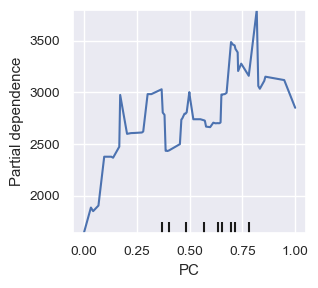

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Generate Partial Dependence Plot using scaled X
fig, ax = plt.subplots(figsize=(3, 2.9))
tree_disp = PartialDependenceDisplay.from_estimator(model, X, [0], ax=ax)

# Extract grid values (X-axis values in scaled form)
scaled_feature_values = tree_disp.lines_[0][0].get_xdata()

# Extract PDP values (Y-axis values)
pdp_values = tree_disp.lines_[0][0].get_ydata()

# Convert scaled X-axis values back to original feature values
original_feature_values = scaler.inverse_transform(
    np.hstack((scaled_feature_values.reshape(-1, 1),
               np.zeros((scaled_feature_values.shape[0], X.shape[1] - 1)))))[:, 0]

# Create a DataFrame with both scaled and original values
pdp_data = pd.DataFrame({
    "Scaled Feature Values": scaled_feature_values,
    "Original Feature Values": original_feature_values,
    "Partial Dependence Values": pdp_values
})

# Define the file path for saving the Excel file
pdp_file_path = r"C:\Users\yassi\Documents\pdp_feature_values.xlsx"  # Adjust the path as needed

# Save the DataFrame to an Excel file
pdp_data.to_excel(pdp_file_path, index=False)

# Provide confirmation
print(f"PDP data saved successfully to: {pdp_file_path}")


PDP data for Feature 2 saved successfully to: C:\Users\yassi\Documents\pdp_feature_2_values.xlsx


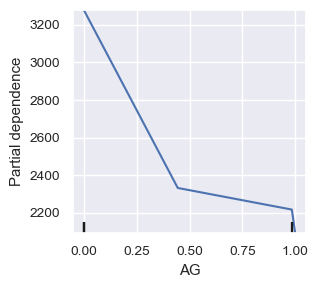

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Generate Partial Dependence Plot for Feature 2 (index [1])
fig, ax = plt.subplots(figsize=(3, 2.9))
tree_disp = PartialDependenceDisplay.from_estimator(model, X, [13], ax=ax)

# Extract grid values (X-axis values in scaled form)
scaled_feature_values = tree_disp.lines_[0][0].get_xdata()

# Extract PDP values (Y-axis values)
pdp_values = tree_disp.lines_[0][0].get_ydata()

# Convert scaled X-axis values back to original feature values (Feature 2)
original_feature_values = scaler.data_min_[13] + (scaled_feature_values * (scaler.data_max_[13] - scaler.data_min_[13]))

# Create a DataFrame with both scaled and original values
pdp_data = pd.DataFrame({
    "Scaled Feature 2 Values": scaled_feature_values,
    "Original Feature 2 Values": original_feature_values,
    "Partial Dependence Values": pdp_values
})

# Define the file path for saving the Excel file
pdp_file_path = r"C:\Users\yassi\Documents\pdp_feature_2_values.xlsx"  # Adjust the path as needed

# Save the DataFrame to an Excel file
pdp_data.to_excel(pdp_file_path, index=False)

# Provide confirmation 
print(f"PDP data for Feature 2 saved successfully to: {pdp_file_path}")
